In [ ]:
# importing necessary libaries

In [143]:
import pandas as pd
import numpy as np
import nltk
import string, re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# reading the .csv file

In [2]:
df=pd.read_csv('Donald-Tweets!.csv@dl=0')
df.head(2)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN


In [166]:
# checking the data types of each feature

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Data columns (total 12 columns):
Date                                         7375 non-null object
Time                                         7375 non-null object
Tweet_Text                                   7375 non-null object
Type                                         7375 non-null object
Media_Type                                   1225 non-null object
Hashtags                                     2031 non-null object
Tweet_Id                                     7375 non-null float64
Tweet_Url                                    7375 non-null object
twt_favourites_IS_THIS_LIKE_QUESTION_MARK    7375 non-null int64
Retweets                                     7375 non-null int64
Unnamed: 10                                  26 non-null float64
Unnamed: 11                                  13 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 691.5+ KB


In [167]:
# convert the datatype of 'date' from object to datetime datatype

In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df['year']=df['Date'].dt.year

In [6]:
df['month']=df['Date'].dt.month

In [7]:
df.head(2)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11,year,month
0,2011-11-16,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN,2011,11
1,2011-11-16,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN,2011,11


In [8]:
# trump tweeted 235  times in the year 2017

In [9]:
len(df[df['year']==2017])

235

# Data pre-processing

**Data-preprocessing1:** Here i am performing following

--> tokenisation

--> removing of stop words

--> removing of punctutation marks

In [54]:
def clean_text(tweet):
    word_token=word_tokenize(tweet.lower())
    word_aftr_stopwords=[word for word in word_token if word not in stopwords.words('english')]
    word_aftr_stp_punc=[word for word in word_aftr_stopwords if word not in string.punctuation]
    word_sentence=' '.join(word_aftr_stp_punc)
    preliminary_clean_data=re.sub('https','',word_sentence)
    return preliminary_clean_data
    

In [55]:
df['preliminary_clean_data']=df['Tweet_Text'].apply(clean_text)

In [56]:
df.head(2)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11,year,month,preliminary_clean_data
0,2011-11-16,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN,2011,11,today express deepest gratitude served armed f...
1,2011-11-16,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN,2011,11,busy day planned new york soon making importan...


**Data-preprocessing2: (removing of special characters & spaces using REGX)** 

Apart from cleaning, data also needs to be processed to remove elements which may cause issues in analysis. Examples of such elements are 'single characters','multiple spaces', 'upper-cased'. Apply various text pre-processing techniques one-by-one to the cleaned data

--> Remove all the special characters

--> Remove single characters appearing in the text except the start

--> Remove single characters appearing at the start

--> Substitute multiple spaces with a single space 

--> convert to lowercase

In [58]:
features=df['preliminary_clean_data']
print(type(features))
print(features)
print(len(features))

<class 'pandas.core.series.Series'>
0       today express deepest gratitude served armed f...
1       busy day planned new york soon making importan...
2       love fact small groups protesters last night p...
3       open successful presidential election professi...
4       fantastic day d.c. met president obama first t...
                              ...                        
7370    loved firing goofball atheist penn pennjillett...
7371    hear pennjillette show broadway terrible surpr...
7372    irrelevant clown karlrove sweats shakes nervou...
7373    `` houstonwelder donald trump one sexiest men ...
7374    rt marklevinshow trump rove clown loser http /...
Name: preliminary_clean_data, Length: 7375, dtype: object
7375


In [59]:
processed_features=[]

for sentence in features:
    proc_feature=re.sub('\W',' ',sentence)
    proc_feature=re.sub('\s+[a-zA-Z]\s+',' ',proc_feature)
    proc_feature=re.sub('^[a-zA-Z]\s+',' ',proc_feature)
    proc_feature=re.sub('\s+',' ',proc_feature)
    proc_feature=proc_feature.lower()   
    processed_features.append(proc_feature)
print(processed_features)

['today express deepest gratitude served armed forces thankavet co wpk7qwpk8z', 'busy day planned new york soon making important decisions people running government', 'love fact small groups protesters last night passion great country come together proud', 'open successful presidential election professional protesters incited media protesting unfair', 'fantastic day c met president obama first time really good meeting great chemistry melania liked mrs lot', 'happy 241st birthday s marine corps thank service co lz2dhrxzo4', 'beautiful important evening forgotten man woman never forgotten come together never', 'watching returns 9 45pm electionnight maga__ co hfujerzbod', 'rt ivankatrump surreal moment vote father president united states make voice heard vote election2_', 'rt erictrump join family incredible movement makeamericagreatagain please vote america ', 'rt donaldjtrumpjr final push eric dozens radio interviews win thing get vote maga electionday ht_', 'still time votetrump ivoted

In [60]:
df['processed_text']=processed_features
df.head(2)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11,year,month,preliminary_clean_data,processed_text
0,2011-11-16,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN,2011,11,today express deepest gratitude served armed f...,today express deepest gratitude served armed f...
1,2011-11-16,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN,2011,11,busy day planned new york soon making importan...,busy day planned new york soon making importan...


## Ngrams

working with **'ngrams'**

In [64]:
processed_text_ngrams=list(nltk.ngrams(df['processed_text'],8))
processed_text_ngrams[:3]

[('today express deepest gratitude served armed forces thankavet co wpk7qwpk8z',
  'busy day planned new york soon making important decisions people running government',
  'love fact small groups protesters last night passion great country come together proud',
  'open successful presidential election professional protesters incited media protesting unfair',
  'fantastic day c met president obama first time really good meeting great chemistry melania liked mrs lot',
  'happy 241st birthday s marine corps thank service co lz2dhrxzo4',
  'beautiful important evening forgotten man woman never forgotten come together never',
  'watching returns 9 45pm electionnight maga__ co hfujerzbod'),
 ('busy day planned new york soon making important decisions people running government',
  'love fact small groups protesters last night passion great country come together proud',
  'open successful presidential election professional protesters incited media protesting unfair',
  'fantastic day c met pre

## Stemming

for performing stemming operation --> using **porter stemmer**

Stemming operation will remove all the suffixes & prefixes of tokenised words to make it a root form of word

Instead of porter stemmer we can use Snow ball stemmer or Lancaster stemmer

In [79]:
stem=[]
stem_word=[]
for sentence in df['processed_text']:
    word_tkn=word_tokenize(sentence)
    stemmer=PorterStemmer()
    for word in word_tkn:
        stem_word.append(stemmer.stem(word))
    stem.append(' '.join(stem_word))
    stem_word=[]
stem

['today express deepest gratitud serv arm forc thankavet co wpk7qwpk8z',
 'busi day plan new york soon make import decis peopl run govern',
 'love fact small group protest last night passion great countri come togeth proud',
 'open success presidenti elect profession protest incit media protest unfair',
 'fantast day c met presid obama first time realli good meet great chemistri melania like mr lot',
 'happi 241st birthday s marin corp thank servic co lz2dhrxzo4',
 'beauti import even forgotten man woman never forgotten come togeth never',
 'watch return 9 45pm electionnight maga__ co hfujerzbod',
 'rt ivankatrump surreal moment vote father presid unit state make voic heard vote election2_',
 'rt erictrump join famili incred movement makeamericagreatagain pleas vote america',
 'rt donaldjtrumpjr final push eric dozen radio interview win thing get vote maga electionday ht_',
 'still time votetrump ivot electionnight co uztyay1ba6',
 'dont let keep get vote elect far well much time left 

In [82]:
df['Stemmer_text_porter']=stem

In [84]:
df.head(2)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11,year,month,preliminary_clean_data,processed_text,Stemmer_text_porter
0,2011-11-16,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN,2011,11,today express deepest gratitude served armed f...,today express deepest gratitude served armed f...,today express deepest gratitud serv arm forc t...
1,2011-11-16,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN,2011,11,busy day planned new york soon making importan...,busy day planned new york soon making importan...,busi day plan new york soon make import decis ...


## Lemmatisation

Lemmatisation will convert the tokenised words into root form of words based on the context of grammar. 

**For example:** adjective form of 'working' is working and its verb form is 'work'. Same is explained below

lemmtz=WordNetLemmatizer()

lemmtz.lemmatize('working','a')  

output --> working

lemmtz=WordNetLemmatizer()

lemmtz.lemmatize('working','v')

output --> work



In [160]:
lemmtz=WordNetLemmatizer()
lemmtz.lemmatize('working','v')

'work'

In [92]:
lemm=[]
lem_word=[]
for sentence in df['processed_text']:
    word_tkn=word_tokenize(sentence)
    lemmtz=WordNetLemmatizer()
    for word in word_tkn:
        lem_word.append(lemmtz.lemmatize(word))
    lemm.append(' '.join(lem_word))
    lem_word=[]
df['Lemmatise_text']=lemm

df.head(2)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11,year,month,preliminary_clean_data,processed_text,Stemmer_text_porter,Lemmatise_text
0,2011-11-16,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN,2011,11,today express deepest gratitude served armed f...,today express deepest gratitude served armed f...,today express deepest gratitud serv arm forc t...,today express deepest gratitude served armed f...
1,2011-11-16,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN,2011,11,busy day planned new york soon making importan...,busy day planned new york soon making importan...,busi day plan new york soon make import decis ...,busy day planned new york soon making importan...


## Calculation of sentiment scores

In [165]:
# doing sentiment analysis using 'textblob'

In [95]:
from textblob import TextBlob

In [96]:
def generate_polarity(txt):
    sentiment=TextBlob(txt).sentiment
    return sentiment

In [105]:
sentiment=df['Lemmatise_text'].apply(generate_polarity)
sentiment

0                                      (0.0, 0.0)
1       (0.21212121212121213, 0.5848484848484848)
2                      (0.37, 0.5633333333333332)
3                                (0.0875, 0.6375)
4                      (0.55, 0.6766666666666667)
                          ...                    
7370                                   (0.7, 0.8)
7371                             (-0.4875, 0.825)
7372                                  (-0.5, 1.0)
7373                  (0.5249999999999999, 0.625)
7374                                   (0.0, 0.0)
Name: Lemmatise_text, Length: 7375, dtype: object

In [106]:
# converting 'sentiment' (which is in Series) to dataframe
sentiment=sentiment.to_frame()
sentiment

,Lemmatise_text
0,"(0.0, 0.0)"
1,"(0.21212121212121213, 0.5848484848484848)"
2,"(0.37, 0.5633333333333332)"
3,"(0.0875, 0.6375)"
4,"(0.55, 0.6766666666666667)"
...,...
7370,"(0.7, 0.8)"
7371,"(-0.4875, 0.825)"
7372,"(-0.5, 1.0)"
7373,"(0.5249999999999999, 0.625)"


In [107]:
df['tweet_score']=sentiment
df.head(2)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11,year,month,preliminary_clean_data,processed_text,Stemmer_text_porter,Lemmatise_text,tweet_score
0,2011-11-16,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN,2011,11,today express deepest gratitude served armed f...,today express deepest gratitude served armed f...,today express deepest gratitud serv arm forc t...,today express deepest gratitude served armed f...,"(0.0, 0.0)"
1,2011-11-16,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN,2011,11,busy day planned new york soon making importan...,busy day planned new york soon making importan...,busi day plan new york soon make import decis ...,busy day planned new york soon making importan...,"(0.21212121212121213, 0.5848484848484848)"


In [110]:
sentiment['polarity']=sentiment['Lemmatise_text'].apply(lambda x:x[0])
df['polarity']=sentiment['polarity']
df.head(2)

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11,year,month,preliminary_clean_data,processed_text,Stemmer_text_porter,Lemmatise_text,tweet_score,polarity
0,2011-11-16,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN,2011,11,today express deepest gratitude served armed f...,today express deepest gratitude served armed f...,today express deepest gratitud serv arm forc t...,today express deepest gratitude served armed f...,"(0.0, 0.0)",0.000000
1,2011-11-16,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN,2011,11,busy day planned new york soon making importan...,busy day planned new york soon making importan...,busi day plan new york soon make import decis ...,busy day planned new york soon making importan...,"(0.21212121212121213, 0.5848484848484848)",0.212121


In [164]:
# plotting the polarity using histogram

Text(0, 0.5, 'frequency')

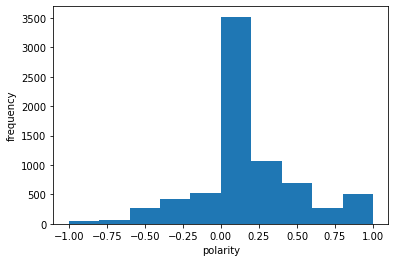

In [116]:
plt.hist(df['polarity'])
plt.xlabel('polarity')
plt.ylabel('frequency')

**polarity_category** --> 1 is positive tweets
 
                      -1 is negative tweets
                        
                      0 is neutral tweets

In [126]:
df['polarity_category']=[1 if x>0 else -1 if x<0 else 0 for x in df['polarity']  ]
df.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,...,Unnamed: 11,year,month,preliminary_clean_data,processed_text,Stemmer_text_porter,Lemmatise_text,tweet_score,polarity,polarity_category
0,2011-11-16,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,...,NaN,2011,11,today express deepest gratitude served armed f...,today express deepest gratitude served armed f...,today express deepest gratitud serv arm forc t...,today express deepest gratitude served armed f...,"(0.0, 0.0)",0.000000,0
1,2011-11-16,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,...,NaN,2011,11,busy day planned new york soon making importan...,busy day planned new york soon making importan...,busi day plan new york soon make import decis ...,busy day planned new york soon making importan...,"(0.21212121212121213, 0.5848484848484848)",0.212121,1
2,2011-11-16,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,...,NaN,2011,11,love fact small groups protesters last night p...,love fact small groups protesters last night p...,love fact small group protest last night passi...,love fact small group protester last night pas...,"(0.37, 0.5633333333333332)",0.370000,1
3,2011-11-16,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,...,NaN,2011,11,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,open successful presidential election professi...,"(0.0875, 0.6375)",0.087500,1
4,2011-11-16,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,...,NaN,2011,11,fantastic day d.c. met president obama first t...,fantastic day c met president obama first time...,fantast day c met presid obama first time real...,fantastic day c met president obama first time...,"(0.55, 0.6766666666666667)",0.550000,1


In [127]:
# trumps tweets are more positive & neutral. Negative tweets are less

In [128]:
df['polarity_category'].value_counts()

 1    3676
 0    2376
-1    1323
Name: polarity_category, dtype: int64

# Building ML model

Building the model using the **processed tweets and polarity category**

In [130]:
X=df['processed_text']
y=df['polarity_category']

Above 'processed_text' is in text format. With that text data we can't build ML model. So, we have to convert to numerical
using --**Bag of words or countvectoriser or TFIDF vectoriser. Here i am using TFIDF vectoriser**

In [140]:
tfid_vectors=TfidfVectorizer(stop_words='english')

vector_arry=tfid_vectors.fit_transform(X)
# print(vector_arry)
print(vector_arry.toarray())
print(tfid_vectors.get_feature_names())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00', '000', '007cigarjoe', '007llisav', '00a', '00am', '00gnh9nlet', '00patriot', '00phdhsb37', '00pm', '00pme', '00pmest', '00s5tgsxrm', '01', '01lszwvgyk', '02', '02nmqn3znq', '03', '03uzbgcswb', '044xgnylth', '04qqpgylt7', '05ny0wjhkl', '05sjurjfbf', '08', '08xkebd8be', '09', '092t2vrmew', '09asrbwqrv', '09htbbgphf', '0angxb2bri', '0bf7bolwej', '0bjk9bwkfw', '0bstlvq7v9', '0cidcuofeo', '0da5isxmrz', '0dojemrzc9', '0dyhkzzwvj', '0ei3edqdxb', '0evxj7ww6c', '0ffektsujn', '0iaeipyeho', '0jcjfbcpjz', '0k0y0pgbhc', '0l00ovco5b', '0lje9qbnlh', '0nedlcbklv', '0nnkebsd73', '0nonsense', '0nqlzbwufo', '0obfd9pilr', '0oyedcofse', '0p4qsnaltb', '0qajfocu6y', '0qusxersql', '0r8fc2zzvy', '0rrpbfigxh', '0s51fxoyol', '0sa7huoop1', '0tupanfumr', '0vddgdpctg', '0vxlt9iebr', '0w4ldd7dw3', '0wklnsiss6', '0x2qed7174', '0xitb7xejv', '0yxq4sfslo', '0z

In [163]:
# splitting the data into train & test using sklearn 'train_test_split'

In [151]:
x_train,x_test,y_train,y_test=train_test_split(vector_arry.toarray(),y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)

(5900, 13553)
(5900,)


In [161]:
# here buidling models using random forest & Kneighbour classifier

In [152]:
model=[]
model.append(('RF',RandomForestClassifier()))
model.append(('KN',KNeighborsClassifier()))

for name,model in model:
    kfold=KFold(n_splits=5,random_state=42,shuffle=True)
    cv_score=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    print('{} , accuracy:{}, std.dev:{}' .format(name,cv_score.mean(), cv_score.std()))    

RF , accuracy:0.8086440677966102, std.dev:0.005978031216457071
KN , accuracy:0.6315254237288136, std.dev:0.01332854457717795


In [ ]:
**Conclusion:**
    
1) Above text pre-processing using NLP can be applied to any text data

2) In above i have used Poster stemmer. We can use other stemmer methods also.

3) I have used Random forest & KN classifier while building the model. We 